# Install Requirements

In [91]:
%pip install pandas matplotlib


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [92]:
import pandas as pd

# Load Data

In [93]:
from pathlib import Path

REPOSITORY_PATH = Path().absolute().parent
DATA_DIR = REPOSITORY_PATH / Path("data")

assert DATA_DIR.is_dir()

## Load Sources DB

In [94]:
BRONNEN_DB_DIR = DATA_DIR / Path(
    "ffdb4d71-abb2-44a1-a0b0-f0544d8dacdc_Export-fce68157-ea1d-4e93-b29d-ea26fb67c0fa"
)
assert BRONNEN_DB_DIR.is_dir()

BRONNEN_FILE = BRONNEN_DB_DIR / Path(
    "Bronnen DB ebb1bca364c64cfebc8109b4fc3951eb_all.csv"
)
assert BRONNEN_FILE.is_file()

In [95]:
sources = (
    pd.read_csv(
        BRONNEN_FILE,
        keep_default_na=True,
        dtype={"uBlocked trackers": "Int64"},
    )
    .dropna(subset=["Name", "NR"])
    #.set_index("Name")
)
sources.head()

,Name,URL Domein,Onderwerpen,Sector,Reclame,uBlocked trackers,Commercialiteit,Conclusie over doel vd bron,Vrije labels bron/onderwerp,Thumbs up 8-14?,...,Extra URL,Created time,Created by,URL Moederbedrijf,SlimZ Resultaten DB,Resultaten: toegankelijkheid,Cookie info page,More examples,Toegankelijkheidspagina,Related to Resultaten DB 01 (1) (Bronnen DB)
0,24baby.nl,https://www.24baby.nl/,NaN,Winkels en bedrijven div,over_the_top_ads,5,commercieel,"commercieel informatieproduct, reclamevehikel","nieuws, promotioneel, reclamevehikel, webshop,...",Just-in-case,...,NaN,"November 6, 2023 11:09 AM",Maarten Sprenger,NaN,NaN,"redelijk begrijpelijk,eenvoudig,redelijk begri...",https://24baby.app/privacybeleid,NaN,-,NaN
1,24kitchen.nl,https://www.24kitchen.nl,NaN,Entertainment-industrie,"company_promotion, limited_ads, sluikreclame",17,commercieel,"commercieel informatieproduct, entertainment","entertainment, infotainment, promotioneel",Just-in-case,...,NaN,"December 14, 2023 6:43 PM",Maarten Sprenger,https://privacy.thewaltdisneycompany.com/nl/de...,NaN,redelijk begrijpelijk,https://privacy.thewaltdisneycompany.com/nl/pr...,NaN,-,NaN
2,http://333travel.nl/,https://www.333travel.nl/,NaN,Reisorganisaties,company_promotion,7,commercieel,"informatie in kader van verkoop/bezoek, websh...","bedrijfsinfo/uithangbord, productinformatie, p...",Just-in-case,...,NaN,"February 23, 2024 5:35 PM",Maarten Sprenger,NaN,NaN,nvt,https://www.333travel.nl/cookies,NaN,NaN,NaN
3,absolutefacts.nl,https://www.absolutefacts.nl/,geschiedenis,Internetbedrijven,company_promotion,2,educatief_commercieel,commercieel informatieproduct,"informatie_primair_doel, webshop",Twijfel,...,NaN,"December 14, 2023 7:29 PM",Maarten Sprenger,https://www.absolutefigures.nl/,NaN,redelijk begrijpelijk,https://www.absolutefacts.nl/uw-privacy.htm,NaN,-,NaN
4,http://accuautoshop.nl/,https://www.accuautoshop.nl/,NaN,Winkels en bedrijven div,company_promotion,6,commercieel,webshop/winkel (+productinfo),webshop,Nee,...,NaN,"February 22, 2024 3:23 PM",Maarten Sprenger,NaN,NaN,"nvt,nvt",NaN,NaN,NaN,NaN


In [96]:
sources.columns

Index(['Name', 'URL Domein', 'Onderwerpen', 'Sector', 'Reclame',
       'uBlocked trackers', 'Commercialiteit', 'Conclusie over doel vd bron',
       'Vrije labels bron/onderwerp', 'Thumbs up 8-14?', 'Status',
       'About page', ' Notes', 'Kwaliteit_about', 'Instelling/Bedrijf/Persoon',
       'Resultaten: vrije labels', 'Moederbedrijf DB', 'NR', 'Resultaten DB',
       'Extra URL', 'Created time', 'Created by', 'URL Moederbedrijf',
       'SlimZ Resultaten DB', 'Resultaten: toegankelijkheid',
       'Cookie info page', 'More examples', 'Toegankelijkheidspagina',
       'Related to Resultaten DB 01 (1) (Bronnen DB)'],
      dtype='object')

In [126]:
len(sources)

543

## Load Query DB

In [97]:
QUERY_DIR = DATA_DIR / Path(
    "b1e0c36a-e9d4-49b1-8b6b-2363200e535b_Export-6745f4f4-da35-4e86-9305-61aebe65f565/Query DB 01 5a4aec0449af4acc87a45c19be574353"
)
assert QUERY_DIR.is_dir()

QUERY_FILE = QUERY_DIR / Path("Untitled cacf3a0313a84561bac9b6ea48ecc189_all.csv")
assert QUERY_FILE.is_file()

In [98]:
all_queries = pd.read_csv(QUERY_FILE)

queries = (
    all_queries[all_queries["OK-100"] == "Yes"]
    .drop(["Created time"], axis=1)
    .astype({"Query": pd.StringDtype()})
)
queries.head()

,Query,Onderwerp,Soort Query (select),Leeftijd,Extra (multi),Kennisvenster?,'Samenvatting'?,Extra (top-down),Google,Video Facet,Videos-Schooltv?,Opmerkingen,OK-100,Add Results,Resultaten DB,Date,Bronnen DB,Ranking Conclusie
0,leven,Natuur/Biologie,Named entity,8,Media(ster),Nee,Nee,"Gerelateerde zoekopdrachten (na 10), Meer om t...",https://www.google.com/search?q=leven&rlz=1C5C...,https://www.google.com/search?sca_esv=60037616...,-,NaN,Yes,Done,NaN,NaN,NaN,NaN
1,wat betekent schotse,Taal/Cultuur,Vragen,10,NaN,Nee,Ja,Vragen van anderen (top),https://www.google.com/search?q=wat+betekent+s...,https://www.google.com/search?sca_esv=60037616...,-,NaN,Yes,Done,Schotse - 2 definities - Encyclo (https://www....,NaN,NaN,NaN
2,middellandse zee,Aardrijkskunde,Named entity,11,NaN,Ja uitgebreid,Nee,"Afbeeldingen carroussel (top), Gerelateerde zo...",https://www.google.com/search?q=middellandse+z...,https://www.google.com/search?sca_esv=60037616...,-,NaN,Yes,Done,NaN,NaN,NaN,NaN
3,De smurfen,Taal/Cultuur,Named entity,10,Merk/Bedrijf,Ja,Nee,"Gerelateerde zoekopdrachten (na 10), Meer om t...",https://www.google.nl/search?q=De+smurfen&sca_...,https://www.google.nl/search?sca_esv=578451392...,-,NaN,Yes,Done,NaN,NaN,google.nl/com (https://www.notion.so/google-nl...,NaN
4,keurmerk max,Maatschappij,2 of meer woorden,7,NaN,Nee,Nee,"Gerelateerde zoekopdrachten (na 10), Meer om t...",https://www.google.com/search?q=keurmerk+max&r...,https://www.google.com/search?sca_esv=60037616...,-,NaN,Yes,Done,NaN,NaN,NaN,NaN


In [99]:
len(queries)

100

## Load Results DB

In [100]:
RESULTS_DIR = DATA_DIR / Path(
    "070a93fa-8d4f-45c9-a3fd-c29d93cad3bc_Export-15b240fd-755e-4641-a877-af8349d5274c"
)
assert RESULTS_DIR.is_dir()

RESULTS_FILE = RESULTS_DIR / Path(
    "Resultaten DB 01 a7ef3ccdfad447148261278e6ca29856_all.csv"
)
assert RESULTS_FILE.is_file()

In [101]:
results = (
    pd.read_csv(RESULTS_FILE)
    .drop(["Created time"], axis=1)
    .rename(columns=lambda x: x.strip())
    .astype({"Query": pd.StringDtype(), "Ranking": "Int64"})
)
results.head()

,Titel resultaat,Link/resultaat,Bron: Thumbs up?,Query,Ranking,Bronnen DB,Bron: Inst/Bedrijf,Toegankelijkheid doelgroep (indruk),Relevant?,vrije tags page,...,Opmerking,OnderzoekNr,Bron: Commerciality,Created by,Bron-Status,Bron: Vrije labels,Bron: Sector,Ranking vrije labels,Bron: doel,Related to Bronnen DB test (Resultaten DB)
0,Hoeveel contant geld mag ik thuis bewaren? | R...,https://www.rijksoverheid.nl/onderwerpen/geldz...,Ja,geld (https://www.notion.so/geld-03503decdc9c4...,9,rijksoverheid.nl (https://www.notion.so/rijkso...,Rijksoverheid,redelijk begrijpelijk,relevant,NaN,...,NaN,1,not_for_profit,Maarten Sprenger,Done,"informatie_primair_doel,meertalig,overheidsinf...",Overheid (of i.o.v.),NaN,"overheidsinformatie (overige),overheidsinforma...",NaN
1,Het Nibud (Nationaal Instituut voor Budgetvoor...,https://www.nibud.nl/,Ja,geld (https://www.notion.so/geld-03503decdc9c4...,8,nibud.nl (https://www.notion.so/nibud-nl-624f2...,Nibud (Nationaal Instituut voor Budgetvoorlich...,redelijk begrijpelijk,relevant,NaN,...,NaN,1,not_for_profit,Maarten Sprenger,Done,"kennisbank/centrum,voorlichting",Onafhankelijk Kennis- en adviescentrum,NaN,kennisbank/centrum +,NaN
2,Geld | RTL Nieuws,https://www.rtlnieuws.nl/tags/onderwerpen/econ...,Just-in-case,geld (https://www.notion.so/geld-03503decdc9c4...,7,rtlnieuws.nl (https://www.notion.so/rtlnieuws-...,RTL Nederland B.V.,nvt,relevant,NaN,...,NaN,1,commercieel,Maarten Sprenger,Done,"infinite_scroll,journalistiek,nieuws",Div commerciële uitgevers,NaN,"journalistiek informatieproduct,link-vehikel,r...",NaN
3,Geld | AD.nl,https://www.ad.nl/geld/?referrer=https%3A%2F%2...,Just-in-case,geld (https://www.notion.so/geld-03503decdc9c4...,6,ad.nl (https://www.notion.so/ad-nl-800ddede7f5...,"AD, DPG Media Group",nvt,relevant,NaN,...,NaN,1,commercieel,Maarten Sprenger,Done,"journalistiek,nieuws,paywall (geheel/gedeeltel...",Uitgevers (journalistiek),NaN,journalistiek informatieproduct (betaald)),NaN
4,Geld | Het laatste nieuws uit Nederland lees j...,https://www.telegraaf.nl/financieel/geld,Just-in-case,geld (https://www.notion.so/geld-03503decdc9c4...,5,telegraaf.nl (https://www.notion.so/telegraaf-...,"De Telegraaf, Mediahuis Nederland B.V.",nvt,relevant,NaN,...,NaN,1,commercieel,Maarten Sprenger,Done,"journalistiek,nieuws,paywall (geheel/gedeeltel...",Div commerciële uitgevers,NaN,journalistiek informatieproduct (betaald)),NaN


In [102]:
len(results)

1008

In [103]:
COLUMNS_WITH_LINK = ["Query", "Bronnen DB"]
assert all(column in results.columns for column in COLUMNS_WITH_LINK)

for column in COLUMNS_WITH_LINK:
    results[column] = (results[column].str.split(" \(").str[0]).astype(pd.StringDtype())
results.head()

,Titel resultaat,Link/resultaat,Bron: Thumbs up?,Query,Ranking,Bronnen DB,Bron: Inst/Bedrijf,Toegankelijkheid doelgroep (indruk),Relevant?,vrije tags page,...,Opmerking,OnderzoekNr,Bron: Commerciality,Created by,Bron-Status,Bron: Vrije labels,Bron: Sector,Ranking vrije labels,Bron: doel,Related to Bronnen DB test (Resultaten DB)
0,Hoeveel contant geld mag ik thuis bewaren? | R...,https://www.rijksoverheid.nl/onderwerpen/geldz...,Ja,geld,9,rijksoverheid.nl,Rijksoverheid,redelijk begrijpelijk,relevant,NaN,...,NaN,1,not_for_profit,Maarten Sprenger,Done,"informatie_primair_doel,meertalig,overheidsinf...",Overheid (of i.o.v.),NaN,"overheidsinformatie (overige),overheidsinforma...",NaN
1,Het Nibud (Nationaal Instituut voor Budgetvoor...,https://www.nibud.nl/,Ja,geld,8,nibud.nl,Nibud (Nationaal Instituut voor Budgetvoorlich...,redelijk begrijpelijk,relevant,NaN,...,NaN,1,not_for_profit,Maarten Sprenger,Done,"kennisbank/centrum,voorlichting",Onafhankelijk Kennis- en adviescentrum,NaN,kennisbank/centrum +,NaN
2,Geld | RTL Nieuws,https://www.rtlnieuws.nl/tags/onderwerpen/econ...,Just-in-case,geld,7,rtlnieuws.nl,RTL Nederland B.V.,nvt,relevant,NaN,...,NaN,1,commercieel,Maarten Sprenger,Done,"infinite_scroll,journalistiek,nieuws",Div commerciële uitgevers,NaN,"journalistiek informatieproduct,link-vehikel,r...",NaN
3,Geld | AD.nl,https://www.ad.nl/geld/?referrer=https%3A%2F%2...,Just-in-case,geld,6,ad.nl,"AD, DPG Media Group",nvt,relevant,NaN,...,NaN,1,commercieel,Maarten Sprenger,Done,"journalistiek,nieuws,paywall (geheel/gedeeltel...",Uitgevers (journalistiek),NaN,journalistiek informatieproduct (betaald)),NaN
4,Geld | Het laatste nieuws uit Nederland lees j...,https://www.telegraaf.nl/financieel/geld,Just-in-case,geld,5,telegraaf.nl,"De Telegraaf, Mediahuis Nederland B.V.",nvt,relevant,NaN,...,NaN,1,commercieel,Maarten Sprenger,Done,"journalistiek,nieuws,paywall (geheel/gedeeltel...",Div commerciële uitgevers,NaN,journalistiek informatieproduct (betaald)),NaN


## Join Results and Sources

In [106]:
results_sources = results.join(
    sources.set_index("Name"),
    on="Bronnen DB",
    how="outer",
    lsuffix="_source",
    rsuffix="_result",
)

results_sources

,Titel resultaat,Link/resultaat,Bron: Thumbs up?,Query,Ranking,Bronnen DB,Bron: Inst/Bedrijf,Toegankelijkheid doelgroep (indruk),Relevant?,vrije tags page,...,Extra URL,Created time,Created by_result,URL Moederbedrijf,SlimZ Resultaten DB,Resultaten: toegankelijkheid,Cookie info page,More examples,Toegankelijkheidspagina,Related to Resultaten DB 01 (1) (Bronnen DB)
511.0,Embryo: het prille begin van je baby – 24Baby.nl,https://www.24baby.nl/zwanger/zwangerschap-zo-...,Just-in-case,wat is een foetus?,4,24baby.nl,24baby,complex,relevant,NaN,...,NaN,"November 6, 2023 11:09 AM",Maarten Sprenger,NaN,NaN,"redelijk begrijpelijk,eenvoudig,redelijk begri...",https://24baby.app/privacybeleid,NaN,-,NaN
512.0,Foetus: van embryo tot baby – 24Baby.nl,https://www.24baby.nl/zwanger/zwangerschap-zo-...,Just-in-case,wat is een foetus?,2,24baby.nl,24baby,redelijk begrijpelijk,relevant,NaN,...,NaN,"November 6, 2023 11:09 AM",Maarten Sprenger,NaN,NaN,"redelijk begrijpelijk,eenvoudig,redelijk begri...",https://24baby.app/privacybeleid,NaN,-,NaN
615.0,Romijn - Herkomst en betekenis van de naam Rom...,https://www.24baby.nl/babynamen/romijn/#:~:tex...,Just-in-case,waar komt de naam Romen van,1,24baby.nl,24baby,redelijk begrijpelijk,relevant,NaN,...,NaN,"November 6, 2023 11:09 AM",Maarten Sprenger,NaN,NaN,"redelijk begrijpelijk,eenvoudig,redelijk begri...",https://24baby.app/privacybeleid,NaN,-,NaN
755.0,Babynamen 2023: dit worden de populairste name...,https://www.24baby.nl/zwanger/babynamen/babyna...,Just-in-case,populairenamen,10,24baby.nl,24baby,redelijk begrijpelijk,relevant,NaN,...,NaN,"November 6, 2023 11:09 AM",Maarten Sprenger,NaN,NaN,"redelijk begrijpelijk,eenvoudig,redelijk begri...",https://24baby.app/privacybeleid,NaN,-,NaN
758.0,Dit zijn de populairste babynamen van 2022! – ...,https://www.24baby.nl/zwanger/babynamen/dit-zi...,Just-in-case,populairenamen,7,24baby.nl,24baby,eenvoudig,relevant,NaN,...,NaN,"November 6, 2023 11:09 AM",Maarten Sprenger,NaN,NaN,"redelijk begrijpelijk,eenvoudig,redelijk begri...",https://24baby.app/privacybeleid,NaN,-,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137.0,Otter | De Zoogdiervereniging,https://www.zoogdiervereniging.nl/zoogdiersoor...,Ja,otter kenmerken,1,zoogdiervereniging.nl,De Zoogdiervereniging,complex,relevant,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
506.0,Embryo,https://www.zwangerenportaal.nl/embryo,Just-in-case,wat is een foetus?,9,zwangerenportaal.nl,Zwangerenportaal B.V.,redelijk begrijpelijk,relevant,NaN,...,https://www.zwangerenportaal.nl/adverteren-op-...,"December 15, 2023 2:26 PM",Maarten Sprenger,NaN,NaN,"redelijk begrijpelijk,redelijk begrijpelijk",https://www.zwangerenportaal.nl/cookieverklaring,NaN,NaN,NaN
509.0,Foetus,https://www.zwangerenportaal.nl/foetus,Just-in-case,wat is een foetus?,6,zwangerenportaal.nl,Zwangerenportaal B.V.,redelijk begrijpelijk,relevant,NaN,...,https://www.zwangerenportaal.nl/adverteren-op-...,"December 15, 2023 2:26 PM",Maarten Sprenger,NaN,NaN,"redelijk begrijpelijk,redelijk begrijpelijk",https://www.zwangerenportaal.nl/cookieverklaring,NaN,NaN,NaN
405.0,de bal van mo - Uitgeverij Zwijsen,https://www.zwijsen.nl/product/de-bal-van-mo-9...,Just-in-case,de bal,9,zwijsen.nl,Uitgeverij Zwijsen,nvt,niet_relevant,webshop-result page,...,NaN,"January 2, 2024 10:57 AM",Maarten Sprenger,NaN,NaN,"nvt,nvt",NaN,NaN,NaN,NaN


## Match Sources and Queries

In [107]:
query = queries["Query"].sample(n=1).iloc[0]
query

'autosport'

In [108]:
results.loc[results["Query"].str.startswith(query)].sort_values(by="Ranking")

,Titel resultaat,Link/resultaat,Bron: Thumbs up?,Query,Ranking,Bronnen DB,Bron: Inst/Bedrijf,Toegankelijkheid doelgroep (indruk),Relevant?,vrije tags page,...,Opmerking,OnderzoekNr,Bron: Commerciality,Created by,Bron-Status,Bron: Vrije labels,Bron: Sector,Ranking vrije labels,Bron: doel,Related to Bronnen DB test (Resultaten DB)
534,Hét autosportmagazine op internet | Autosport.nl,https://autosport.nl/,Just-in-case,autosport,1,autosport.nl,autosport.nl,nvt,relevant,NaN,...,NaN,1,commercieel,Maarten Sprenger,Done,"journalistiek,nieuws",Div commerciële uitgevers,NaN,commercieel informatieproduct,NaN
533,"Autosport - Formula 1, MotoGP and motorsport n...",https://www.autosport.com/,Just-in-case,autosport,2,autosport.com,NaN,nvt,relevant,NaN,...,NaN,1,commercieel,Maarten Sprenger,Done,"journalistiek,nieuws,paywall (geheel/gedeeltel...",Div commerciële uitgevers,NaN,commercieel informatieproduct,NaN
532,Autosport | Het laatste nieuws uit Nederland l...,https://www.telegraaf.nl/sport/autosport,Just-in-case,autosport,3,telegraaf.nl,"De Telegraaf, Mediahuis Nederland B.V.",nvt,relevant,NaN,...,NaN,1,commercieel,Maarten Sprenger,Done,"journalistiek,nieuws,paywall (geheel/gedeeltel...",Div commerciële uitgevers,NaN,journalistiek informatieproduct (betaald)),NaN
531,"Latest Formula 1 News, Analysis, Results and More",https://www.autosport.com/f1/,Just-in-case,autosport,4,autosport.com,NaN,nvt,relevant,NaN,...,NaN,1,commercieel,Maarten Sprenger,Done,"journalistiek,nieuws,paywall (geheel/gedeeltel...",Div commerciële uitgevers,NaN,commercieel informatieproduct,NaN
530,Autosport.nu – De snelste autosportsite van Ne...,https://www.autosport.nu/,Just-in-case,autosport,5,autosport.nu,AUTOSPORT.NU,nvt,relevant,NaN,...,NaN,1,commercieel,Maarten Sprenger,Almost completed,nieuws,Div commerciële uitgevers,NaN,commercieel informatieproduct,NaN
529,autosport - Google Zoeken videos,https://www.google.nl/search?sca_esv=591183191...,Just-in-case,autosport,6,google.nl/com,Aphabet,nvt,relevant,zoekmachine facet link,...,NaN,1,ultra_commercieel,Maarten Sprenger,Almost completed,"BigTech,zoekmachines",Internetbedrijven,NaN,commercieel informatieproduct,NaN
528,Autosport - Wikipedia,https://nl.wikipedia.org/wiki/Autosport,Ja,autosport,7,wikipedia.org,Wikimedia Foundation inc,redelijk begrijpelijk,relevant,NaN,...,NaN,1,not_for_profit,Maarten Sprenger,Done,"community,informatie_primair_doel,user_generat...",NGO/Goede doelen site,NaN,gebruikersplatform met kwaliteitsinformatie,NaN
527,Autosport | RTL Nieuws,https://www.rtlnieuws.nl/tags/onderwerpen/spor...,Just-in-case,autosport,8,rtlnieuws.nl,RTL Nederland B.V.,nvt,relevant,NaN,...,NaN,1,commercieel,Maarten Sprenger,Done,"infinite_scroll,journalistiek,nieuws",Div commerciële uitgevers,NaN,"journalistiek informatieproduct,link-vehikel,r...",NaN
526,autosport - Google Zoeken plaatsen,https://www.google.nl/search?sca_esv=591183191...,Just-in-case,autosport,9,google.nl/com,Aphabet,nvt,relevant,zoekmachine facet link,...,NaN,1,ultra_commercieel,Maarten Sprenger,Almost completed,"BigTech,zoekmachines",Internetbedrijven,NaN,commercieel informatieproduct,NaN
525,"NOS Sport - Nieuws, Sport en Evenementen | Ned...",https://nos.nl/sport/autosport,Ja,autosport,10,nos.nl,Nederlandse Omroep Stichting (NOS),nvt,relevant,NaN,...,NaN,1,not_for_profit,Maarten Sprenger,Done,"informatie_primair_doel,infotainment,journalis...",Publieke_omroep,NaN,"journalistiek informatieproduct,publiek_mediap...",NaN


# Analysis

## Results

### Vrije Labels

[Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '7'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '12'),
 Text(0, 0, '12'),
 Text(0, 0, '12'),
 Text(0, 0, '15'),
 Text(0, 0, '15'),
 Text(0, 0, '16'),
 Text(0, 0, '17'),
 Text(0, 0, '20'),
 Text(0, 0, '22'),
 Text(0, 0, '23'),
 Text(0, 0, '24'),
 Text(0, 0, '24'),
 Text(0, 0, '27'),
 Text(0, 0, '27'),
 Text(0, 0, '29'),
 Text(0, 0, '32'),
 Text(0, 0, '33'),
 Text(0, 0, '33'),
 Text(0, 0, '34'),
 Text(0, 0, '35'),
 Text(0, 0, '35'),
 Text(0, 0, '38'),
 Text(0, 0, '44'),
 Text(0, 0, '47'),
 Text(0, 0, '53'),
 Text(0, 0, '64'),
 Text(0, 0, '78'),
 Text(0, 0, '78'),
 Text(0, 0, '82'),
 Text(0, 0, '87'),
 Text(0, 0, '101'),
 Text(0, 0, '136'),
 Text(0, 0, '136'),
 Text(0, 0, '136'),
 Text(0

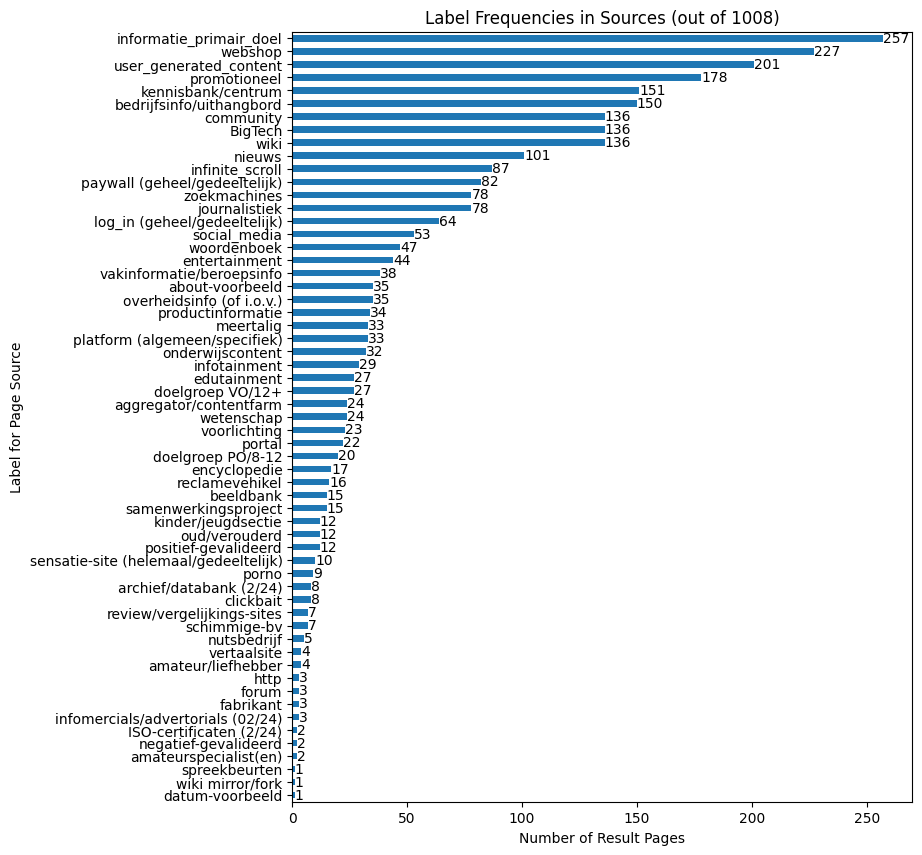

In [109]:
ax = (
    results["Bron: Vrije labels"]
    .str.split(",")
    .explode()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Label Frequencies in Sources (out of {len(results)})",
        xlabel="Number of Result Pages",
        ylabel="Label for Page Source",
        figsize=(8, 10),
    )
)

ax.bar_label(ax.containers[0])

### Result Sources

[Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0

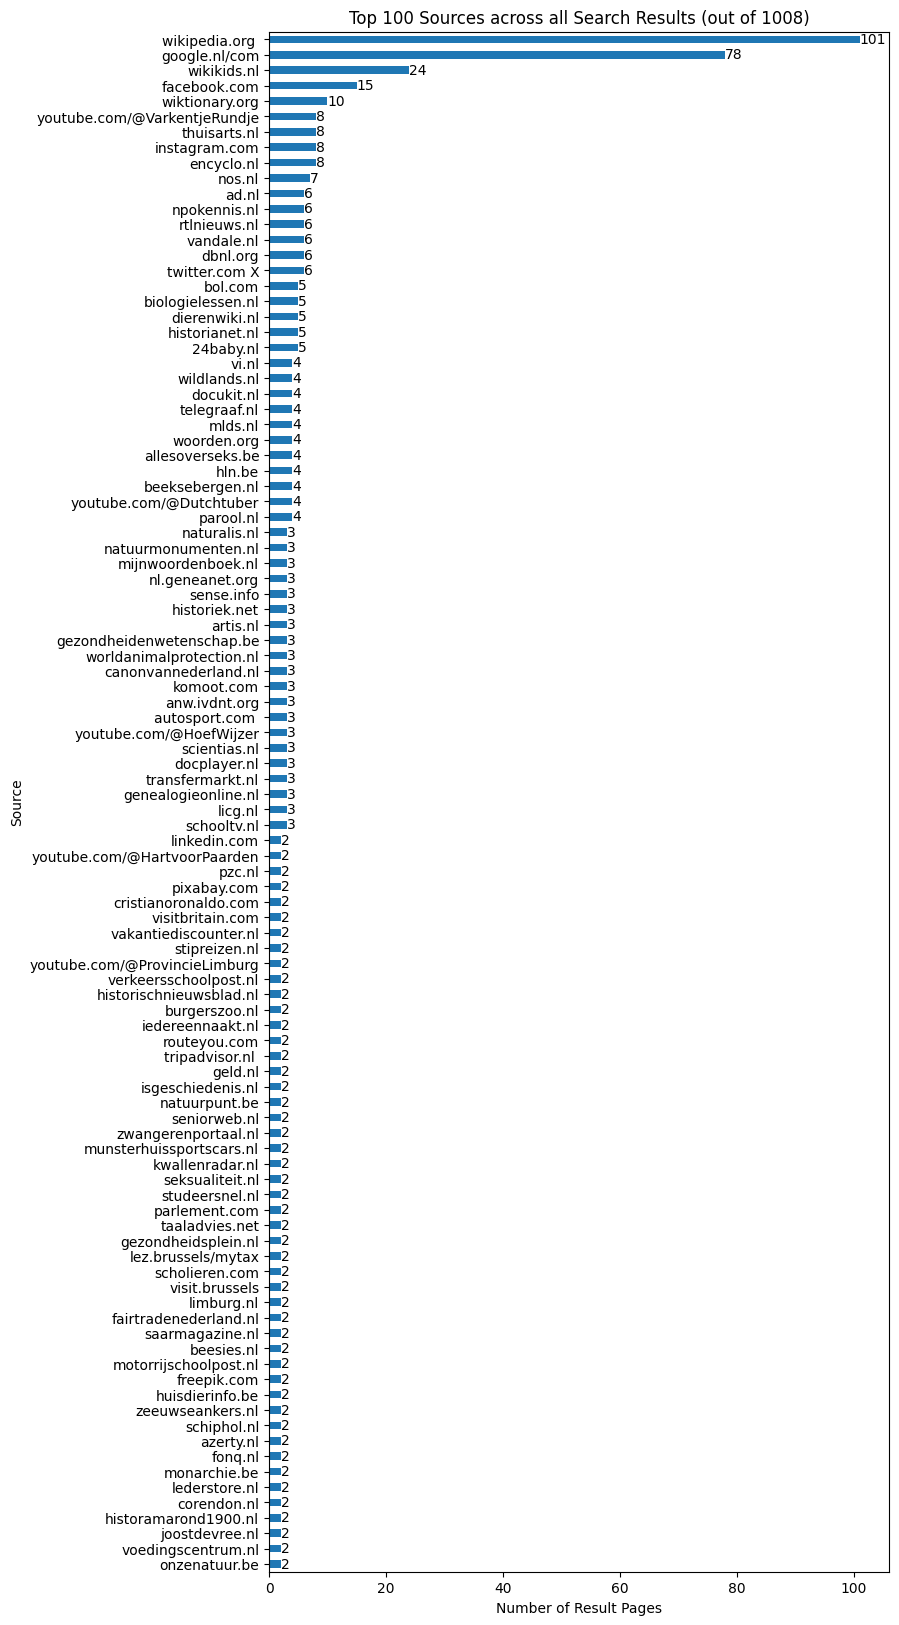

In [110]:
n = 100

ax = (
    results["Bronnen DB"]
    .value_counts()
    .filter(regex="^[^*]")[:n]  # Filter out groups (marked with *)
    .sort_values(ascending=True)
    .plot(
        kind="barh",
        figsize=(8, n // 5),
        title=f"Top {n} Sources across all Search Results (out of {len(results)})",
        xlabel="Number of Result Pages",
        ylabel="Source",
    )
)

ax.bar_label(ax.containers[0])

### Result Types

[Text(0, 0, '142'), Text(0, 0, '169'), Text(0, 0, '697')]

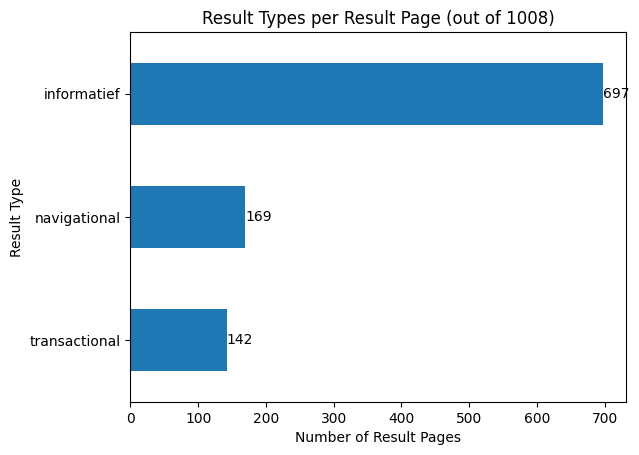

In [111]:
ax = (
    results["Soort Resultaat"]
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Result Types per Result Page (out of {len(results)})",
        xlabel="Number of Result Pages",
        ylabel="Result Type",
    )
)
ax.bar_label(ax.containers[0])

### Result Relevance

[Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '12'),
 Text(0, 0, '122'),
 Text(0, 0, '841')]

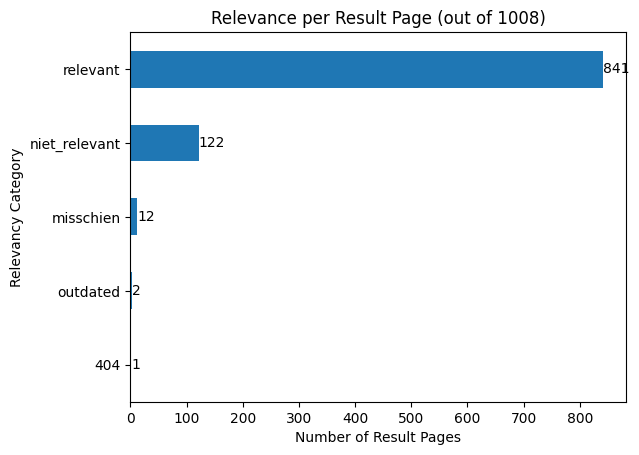

In [112]:
ax = (
    results["Relevant?"]
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Relevance per Result Page (out of {len(results)})",
        xlabel="Number of Result Pages",
        ylabel="Relevancy Category",
    )
)
ax.bar_label(ax.containers[0])

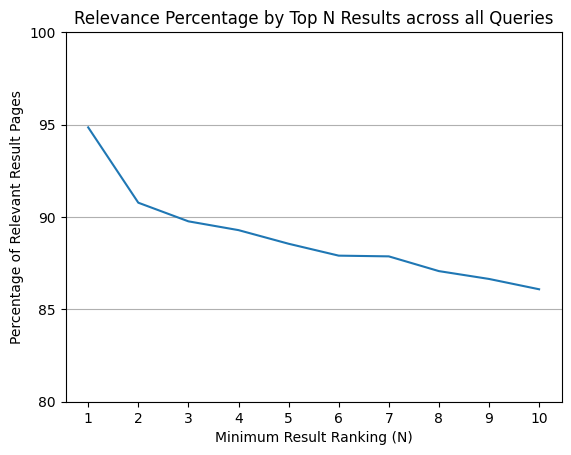

In [113]:
relevant: dict[int, float] = {}

for n in range(1, 11):
    _results = results.loc[results["Ranking"] <= n]
    relevant[n] = _results["Relevant?"].value_counts(normalize=True)["relevant"] * 100

pd.DataFrame(relevant.items(), columns=["Ranking", "Relevance"]).set_index(
    "Ranking"
).plot(
    title="Relevance Percentage by Top N Results across all Queries",
    xlabel="Minimum Result Ranking (N)",
    ylabel="Percentage of Relevant Result Pages",
    xticks=range(1, 11),
    yticks=range(80, 105, 5),
    legend=False,
).grid(axis="y")

### Result Accessibility

[Text(0, 0, '1'),
 Text(0, 0, '8'),
 Text(0, 0, '10'),
 Text(0, 0, '63'),
 Text(0, 0, '294'),
 Text(0, 0, '300'),
 Text(0, 0, '332')]

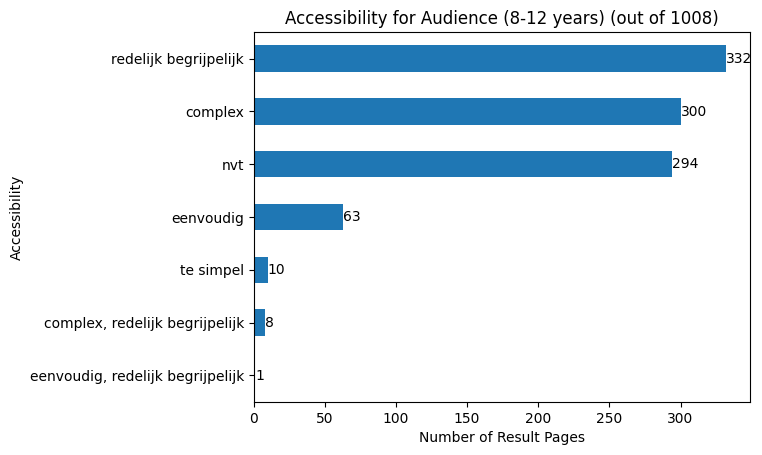

In [114]:
ax = (
    results["Toegankelijkheid doelgroep (indruk)"]
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Accessibility for Audience (8-12 years) (out of {len(results)})",
        xlabel="Number of Result Pages",
        ylabel="Accessibility",
    )
)
ax.bar_label(ax.containers[0])

## Sources

### Commerciality

[Text(0, 0, '1'),
 Text(0, 0, '3'),
 Text(0, 0, '13'),
 Text(0, 0, '18'),
 Text(0, 0, '33'),
 Text(0, 0, '41'),
 Text(0, 0, '48'),
 Text(0, 0, '189'),
 Text(0, 0, '258')]

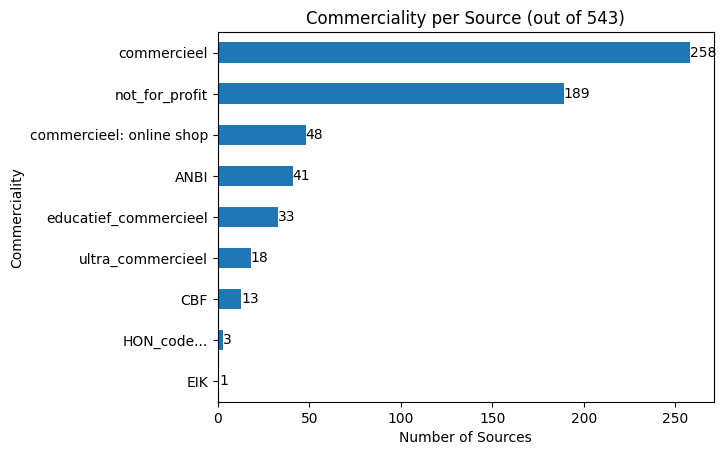

In [116]:
ax = (
    sources["Commercialiteit"]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Commerciality per Source (out of {len(sources)})",
        xlabel="Number of Sources",
        ylabel="Commerciality",
    )
)
ax.bar_label(ax.containers[0])

### Sectors

[Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '6'),
 Text(0, 0, '8'),
 Text(0, 0, '8'),
 Text(0, 0, '8'),
 Text(0, 0, '10'),
 Text(0, 0, '13'),
 Text(0, 0, '15'),
 Text(0, 0, '15'),
 Text(0, 0, '17'),
 Text(0, 0, '20'),
 Text(0, 0, '21'),
 Text(0, 0, '23'),
 Text(0, 0, '32'),
 Text(0, 0, '34'),
 Text(0, 0, '55'),
 Text(0, 0, '74'),
 Text(0, 0, '145')]

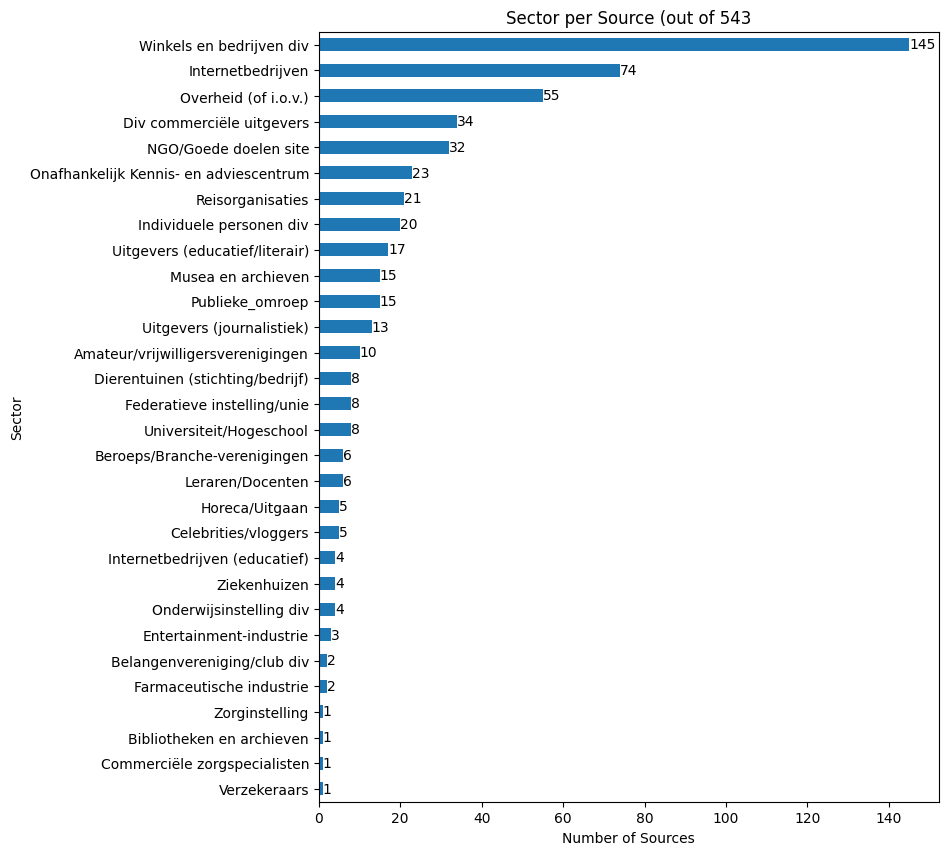

In [117]:
ax = (
    sources["Sector"]
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Sector per Source (out of {len(sources)})",
        xlabel="Number of Sources",
        ylabel="Sector",
        figsize=(8, 10),
    )
)
ax.bar_label(ax.containers[0])

### Free Labels

[Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '7'),
 Text(0, 0, '7'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '10'),
 Text(0, 0, '10'),
 Text(0, 0, '10'),
 Text(0, 0, '11'),
 Text(0, 0, '11'),
 Text(0, 0, '11'),
 Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '13'),
 Text(0, 0, '13'),
 Text(0, 0, '15'),
 Text(0, 0, '15'),
 Text(0, 0, '17'),
 Text(0, 0, '17'),
 Text(0, 0, '17'),
 Text(0, 0, '19'),
 Text(0, 0, '19'),
 Text(0, 0, '24'),
 Text(0, 0, '26'),
 Text(0, 0, '26'),
 Text(0, 0, '29'),
 Text(0, 0, '29'),
 Text(0, 0, '33'),
 Text(0, 0, '40'),
 Text(0, 0, '42'),
 Text(0, 0, '53'),
 

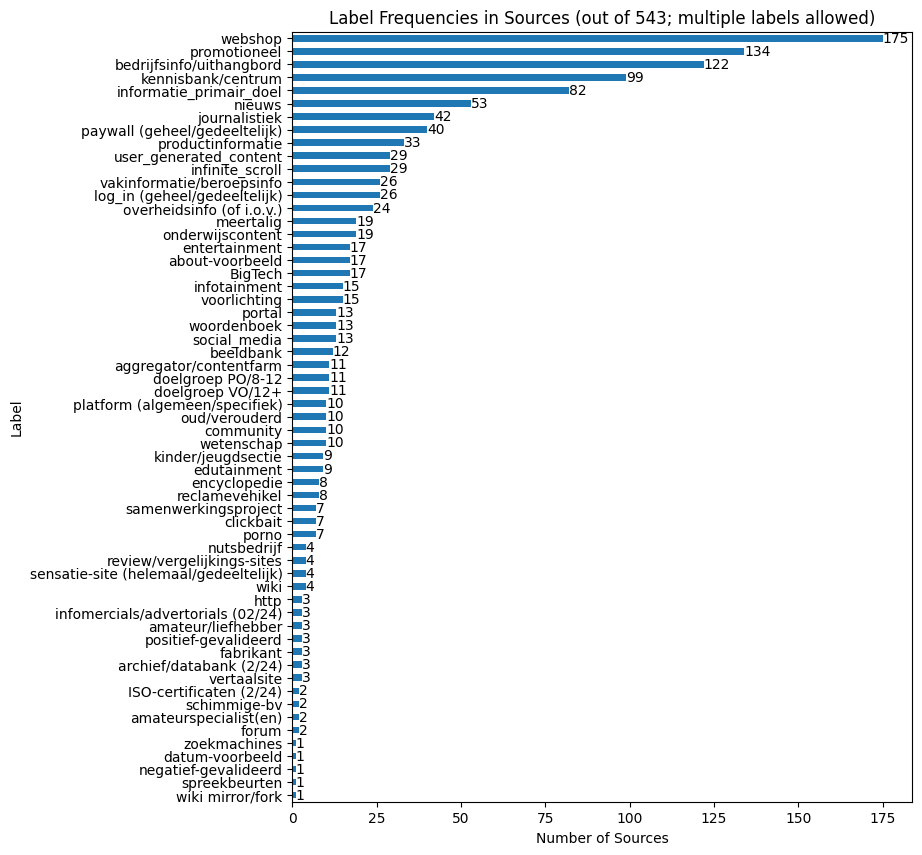

In [118]:
ax = (
    sources["Vrije labels bron/onderwerp"]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Label Frequencies in Sources (out of {len(sources)}; multiple labels allowed)",
        xlabel="Number of Sources",
        ylabel="Label",
        figsize=(8, 10),
    )
)
ax.bar_label(ax.containers[0])

### Trackers

<Axes: title={'center': 'Number of Blocked Trackers per Source (out of 543)'}, xlabel='Number of Sources', ylabel='Number of Blocked Trackers'>

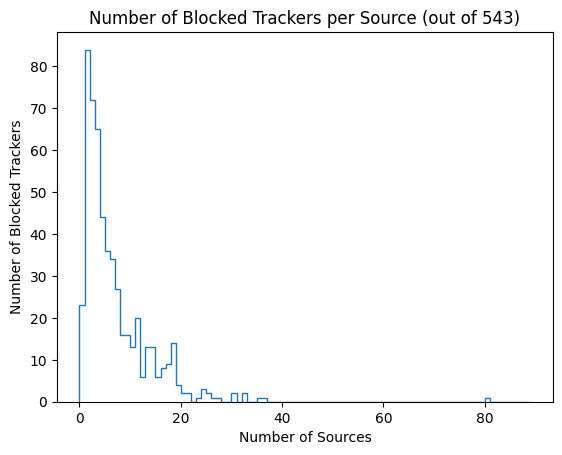

In [119]:
sources["uBlocked trackers"].plot(
    kind="hist",
    histtype="step",
    bins=range(0, 90),
    title=f"Number of Blocked Trackers per Source (out of {len(sources)})",
    ylabel="Number of Blocked Trackers",
    xlabel="Number of Sources",
)

### Ads

[Text(0, 0, '17'),
 Text(0, 0, '288'),
 Text(0, 0, '43'),
 Text(0, 0, '58'),
 Text(0, 0, '162'),
 Text(0, 0, '7'),
 Text(0, 0, '20'),
 Text(0, 0, '6')]

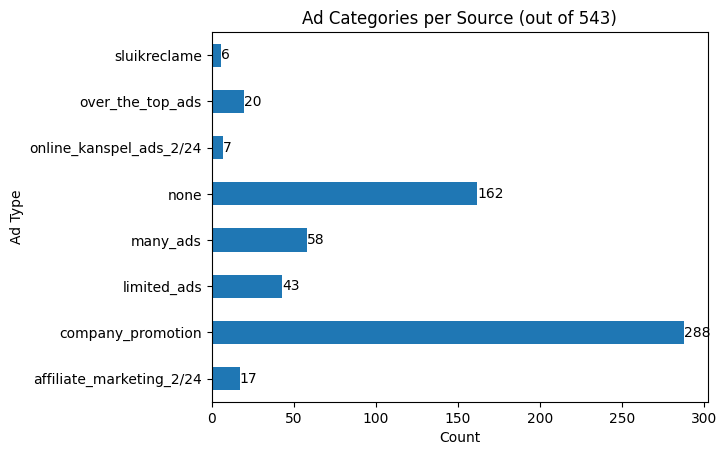

In [120]:
ax = (
    sources["Reclame"]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts()
    .sort_index()
    .plot(
        kind="barh",
        title=f"Ad Categories per Source (out of {len(sources)})",
        xlabel="Count",
        ylabel="Ad Type",
    )
)
ax.bar_label(ax.containers[0])

### Goal of Source

[Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '8'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '9'),
 Text(0, 0, '11'),
 Text(0, 0, '12'),
 Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '13'),
 Text(0, 0, '13'),
 Text(0, 0, '14'),
 Text(0, 0, '14'),
 Text(0, 0, '14'),
 Text(0, 0, '15'),
 Text(0, 0, '15'),
 Text(0, 0, '20'),
 Text(0, 0, '21'),
 Text(0, 0, '32'),
 Text(0, 0, '42'),
 Text(0, 0, '50'),
 Text(0, 0, '54'),
 Text(0, 0, '59'),
 Text(0, 0, '81'),
 Text(0, 0, '92')]

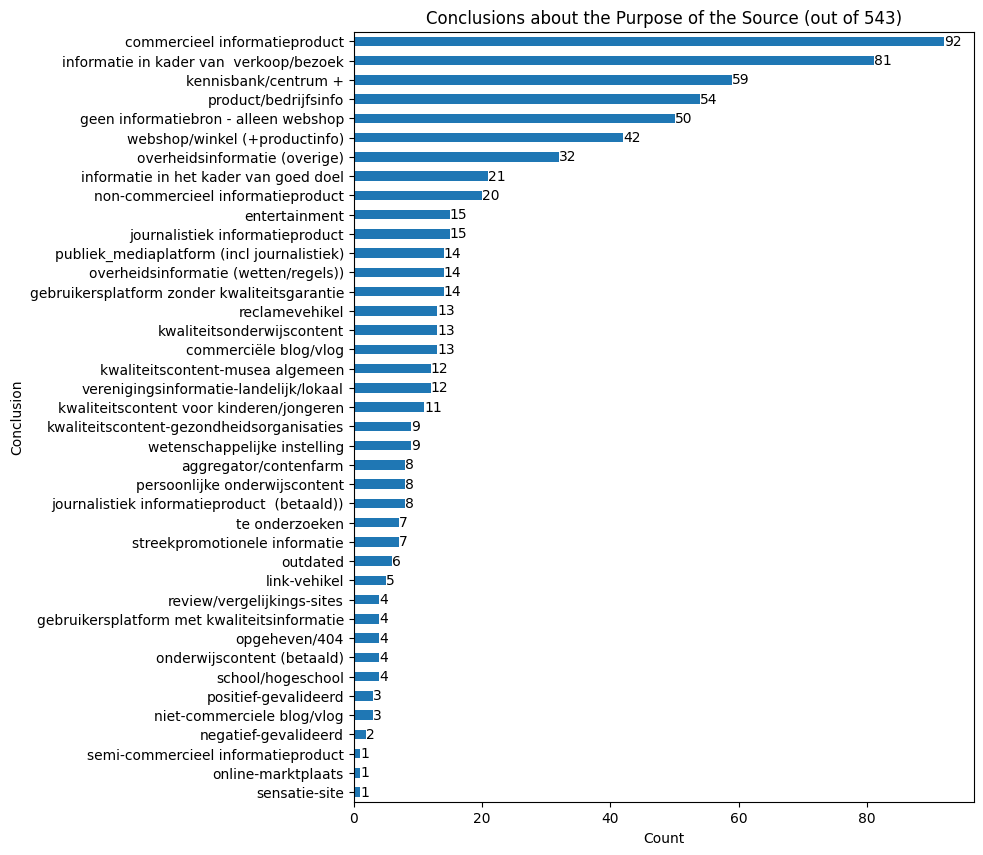

In [121]:
ax = (
    sources["Conclusie over doel vd bron"]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Conclusions about the Purpose of the Source (out of {len(sources)})",
        xlabel="Count",
        ylabel="Conclusion",
        figsize=(8, 10),
    )
)
ax.bar_label(ax.containers[0])

### Source: Thumbs-Up

[Text(0, 0, '21'), Text(0, 0, '167'), Text(0, 0, '177'), Text(0, 0, '178')]

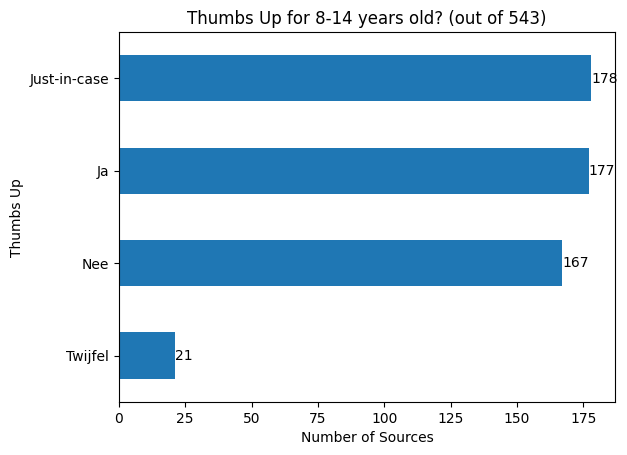

In [122]:
ax = (
    sources["Thumbs up 8-14?"]
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Thumbs Up for 8-14 years old? (out of {len(sources)})",
        xlabel="Number of Sources",
        ylabel="Thumbs Up",
    )
)
ax.bar_label(ax.containers[0])

### About Page

[Text(0, 0, '1'),
 Text(0, 0, '12'),
 Text(0, 0, '14'),
 Text(0, 0, '35'),
 Text(0, 0, '66'),
 Text(0, 0, '202'),
 Text(0, 0, '213')]

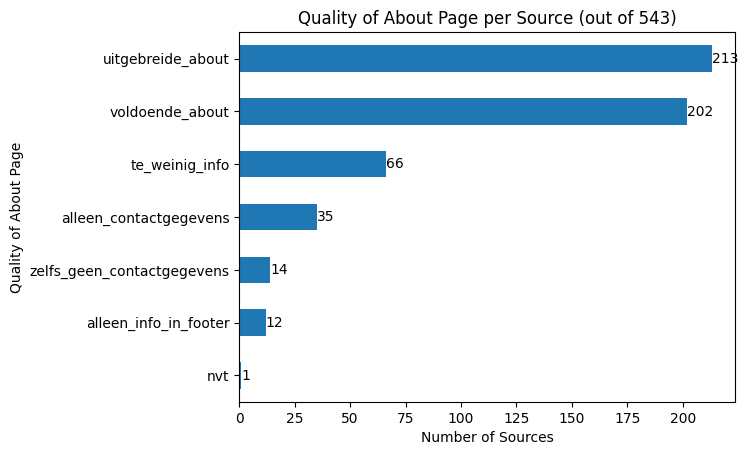

In [123]:
ax = (
    sources["Kwaliteit_about"]
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Quality of About Page per Source (out of {len(sources)})",
        xlabel="Number of Sources",
        ylabel="Quality of About Page",
    )
)
ax.bar_label(ax.containers[0])

## Queries and Result Pages

### Query Length

[Text(0, 0, '46'),
 Text(0, 0, '26'),
 Text(0, 0, '12'),
 Text(0, 0, '7'),
 Text(0, 0, '2'),
 Text(0, 0, '4'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '1')]

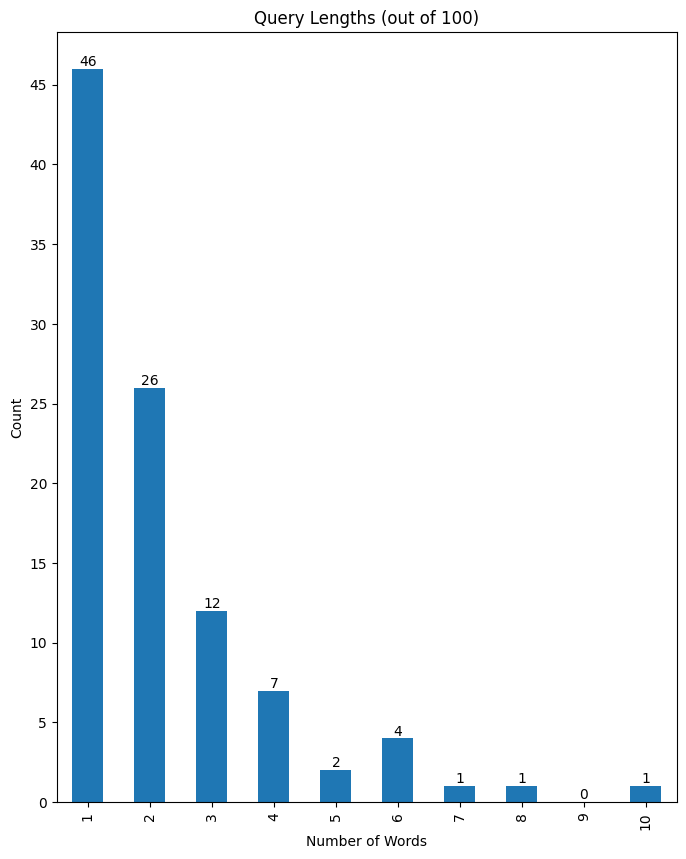

In [124]:
lengths = queries["Query"].str.split(" ").str.len().value_counts()
values = range(1, lengths.index.max() + 1)

ax = lengths.reindex(values, fill_value=0).plot(
    kind="bar",
    title=f"Query Lengths (out of {len(queries)})",
    ylabel="Count",
    xlabel="Number of Words",
    figsize=(8, 10),
    yticks=range(0, 50, 5),
)
ax.bar_label(ax.containers[0])

### Result Page Extras

[Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '7'),
 Text(0, 0, '7'),
 Text(0, 0, '12'),
 Text(0, 0, '15'),
 Text(0, 0, '25'),
 Text(0, 0, '29'),
 Text(0, 0, '67'),
 Text(0, 0, '85')]

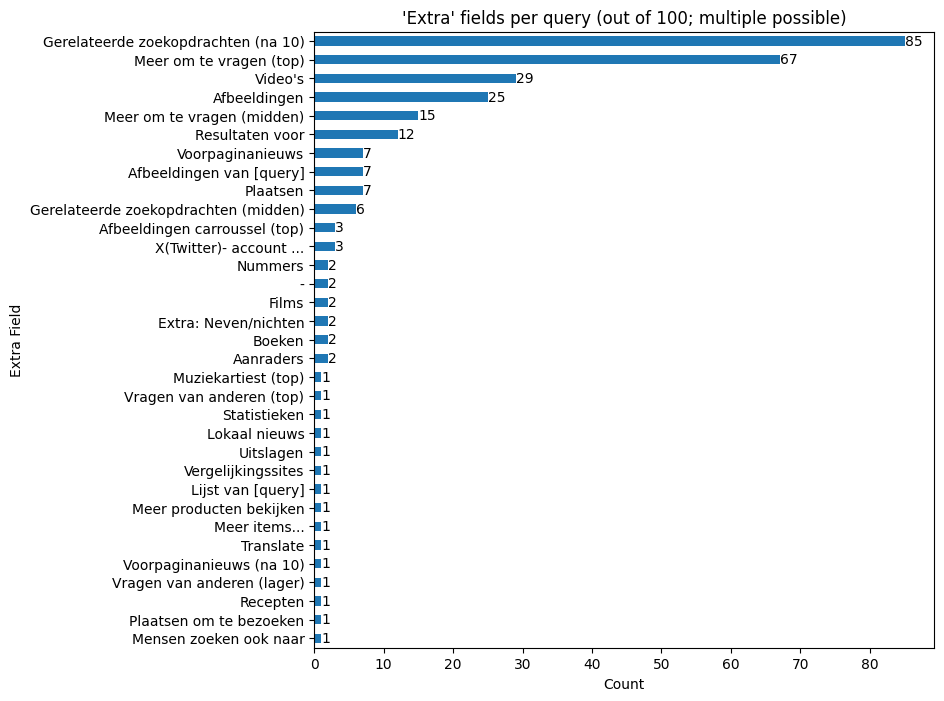

In [125]:
ax = (
    queries["Extra (top-down)"]
    .str.split(", ")
    .explode()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"'Extra' fields per query (out of {len(queries)}; multiple possible)",
        figsize=(8, 8),
        xlabel="Count",
        ylabel="Extra Field",
    )
)
ax.bar_label(ax.containers[0])